In [6]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l

n_train,n_test,num_inputs = 20,100,200
true_w,true_b = torch.ones(num_inputs,1)*0.01,0.05

features = torch.randn((n_train+n_test,num_inputs))
labels = torch.matmul(features,true_w)+true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)
train_features,test_features = features[:n_train,:] , features[n_train: ,:]
train_labels,test_labels = labels[:n_train],labels[n_train:]
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = d2l.linreg, d2l.squared_loss
dataset = torch.utils.data.TensorDataset(train_features,
train_labels)
train_iter = torch.utils.data.DataLoader(dataset, batch_size,
shuffle=True)

In [7]:
#简洁实现
def fit_and_plot_pytorch(wd):
    net = nn.Linear(num_inputs,1)
    nn.init.normal_(net.weight,mean=0,std=1)
    nn.init.normal_(net.bias,mean=0,std=1)
    optimizer_w = torch.optim.SGD(params=[net.weight],lr=lr,weight_decay=wd)
    optimizer_b = torch.optim.SGD(params=[net.bias],lr=lr)
    
    train_ls,test_ls = [],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X),y).mean()
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()
            
            l.backward()
            
            optimizer_w.step()
            optimizer_b.step()
        train_ls.append(loss(net(train_features),train_labels).mean().item())
        test_ls.append(loss(net(test_features),test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs','loss',range(1, num_epochs + 1), test_ls, ['train','test'])
    print('L2 norm of w:', net.weight.data.norm().item())

L2 norm of w: 12.882796287536621


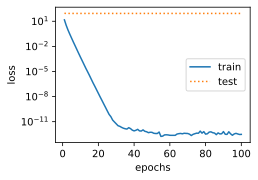

In [8]:
fit_and_plot_pytorch(0)

L2 norm of w: 0.10793635249137878


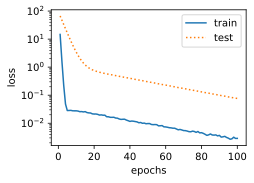

In [9]:
fit_and_plot_pytorch(3)